Linear Regression Coefficients:
Intercept: 2.3063063063063094
Slope: 0.006756756756756757

Quadratic Regression Coefficients:
Intercept: 7.960481099654441
Linear Term Coefficient: -0.15371134020614444
Quadratic Term Coefficient: 0.0010756013745702178


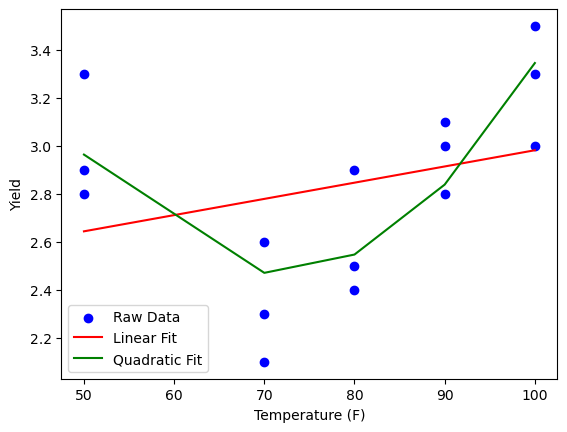

Linear Regression MSE: 0.13270870870870868
Linear Regression RMSE: 0.3642920651190589
Quadratic Regression MSE: 0.047784650630011465
Quadratic Regression RMSE: 0.21859700508015079


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('lab4_q1.csv')
X = data['Temp'].values
y = data['Yield'].values
X_linear = np.vstack([np.ones(len(X)), X]).T
b_linear = np.linalg.inv(X_linear.T @ X_linear) @ X_linear.T @ y
y_pred_linear = X_linear @ b_linear
X_quad = np.vstack([np.ones(len(X)), X, X**2]).T
b_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ y
y_pred_quad = X_quad @ b_quad
print("Linear Regression Coefficients:")
print(f"Intercept: {b_linear[0]}") 5
print(f"Slope: {b_linear[1]}")
print("\nQuadratic Regression Coefficients:")
print(f"Intercept: {b_quad[0]}")
print(f"Linear Term Coefficient: {b_quad[1]}")
print(f"Quadratic Term Coefficient: {b_quad[2]}")
plt.scatter(X, y, color='blue', label='Raw Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Fit')
plt.plot(X, y_pred_quad, color='green', label='Quadratic Fit')
plt.xlabel('Temperature (F)')
plt.ylabel('Yield')
plt.legend()
plt.show()
mse_linear = np.mean((y - y_pred_linear) ** 2)
rmse_linear = np.sqrt(mse_linear)
mse_quad = np.mean((y - y_pred_quad) ** 2)
rmse_quad = np.sqrt(mse_quad)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Quadratic Regression MSE: {mse_quad}")
print(f"Quadratic Regression RMSE: {rmse_quad}")

MULTI DIMENSIONAL


Intercept (b0): -0.13453637823601106
Slope (b1) for Area (X1): 0.6126549752681948
Slope (b2) for X2: -0.24348223339582012
Slope (b3) for X3: -0.06565569473887087
MSE: 0.017028422624564197
RMSE: 0.13049299837372194


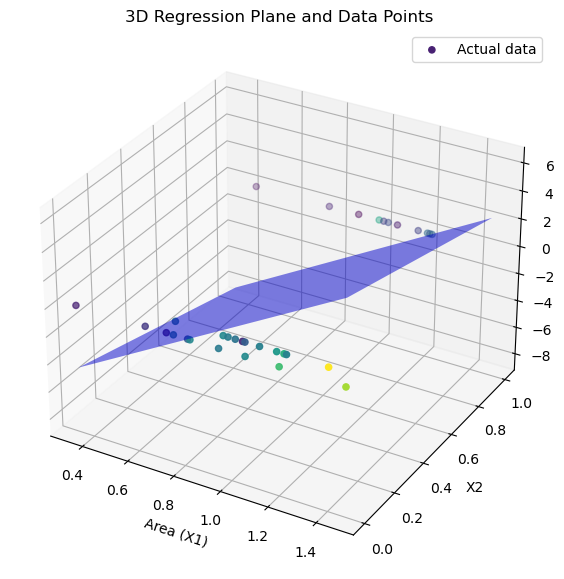

In [18]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("heart.csv")
y = np.array(df['Infarc'].values)
x1 = np.array(df['Area'].values)
x2 = np.array(df['X2'].values)
x3 = np.array(df['X3'].values)
X = np.array([
    [len(x1), np.sum(x1), np.sum(x2), np.sum(x3)],
    [np.sum(x1), np.sum(x1*x1), np.sum(x1*x2), np.sum(x1*x3)],
    [np.sum(x2), np.sum(x2*x1), np.sum(x2*x2), np.sum(x2*x3)],
    [np.sum(x3), np.sum(x3*x1), np.sum(x3*x2), np.sum(x3*x3)]
])
Y = np.array([
    np.sum(y),
    np.sum(x1*y),
    np.sum(x2*y),
    np.sum(x3*y)
])
b = np.linalg.solve(X, Y)
print(f"Intercept (b0): {b[0]}")
print(f"Slope (b1) for Area (X1): {b[1]}")
print(f"Slope (b2) for X2: {b[2]}")
print(f"Slope (b3) for X3: {b[3]}")
ypred = b[0] + b[1]*x1 + b[2]*x2 + b[3]*x3
mse = np.mean((y - ypred) ** 2)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
x3_grid = (b[0] + b[1] * x1_grid + b[2] * x2_grid - y.mean()) / -b[3]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y, cmap='viridis', label='Actual data')
ax.plot_surface(x1_grid, x2_grid, x3_grid, color='blue', alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('Area (X1)')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Regression Plane and Data Points')

plt.legend()
plt.show()